# Question

Pancake Flipping: 
Arielle and Boris compete in the little-known sport of pancake flipping, and have both been nominated for this season's "best pancake flipper" award. Half the people in the pancake flipping league office think Arielle is the better pancake flipper, and the other half think Boris is, so they have retained a data scientist to help solve the issue.
The stats from this season are attached. The columns are:

    -the contestant's name,
    -the match day,
    -which hand they used to flip the pancakes,
    -their score (how many pancakes they flipped successfully), and
    -how many total pancakes they attempted to flip
    
Is Arielle or Boris the better pancake flipper? Justify your decision. Do both sides have a case here?


# Solution:

Loading the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 

Loading the given data from the file "data.csv"

In [3]:
data = pd.read_csv('data.csv')
data

,match_day,name,hand,score,attempts
0,1,Arielle,R,8,20
1,2,Arielle,R,10,20
2,3,Arielle,R,6,20
3,4,Arielle,L,4,20
4,5,Arielle,R,7,20
...,...,...,...,...,...
95,46,Boris,R,10,20
96,47,Boris,L,4,20
97,48,Boris,R,12,20
98,49,Boris,L,4,20


Grouping the data based on Match day count for both the players.

In [4]:
data_new = data.copy()
Days = data_new['match_day'][data_new['name'] == 'Arielle'].tolist()

Arielle = data_new['score'][data_new['name'] == 'Arielle'].tolist()
Arielle_h = data_new['hand'][data_new['name'] == 'Arielle'].tolist()

Boris = data_new['score'][data_new['name'] == 'Boris'].tolist()
Boris_h = data_new['hand'][data_new['name'] == 'Boris'].tolist()

success_flips = pd.DataFrame({'Days': Days, 'Arielle_hand': Arielle_h, 'Arielle_score': Arielle, 
                              'Boris_hand': Boris_h, 'Boris_score':Boris})

print("Total successful flips by...")
print("Arielle:", sum(data_new['score'][data_new['name'] == 'Arielle'].tolist()), 'out of 1000 attempts')
print("Boris:", sum(data_new['score'][data_new['name'] == 'Boris'].tolist()), 'out of 1000 attempts')
success_flips

Total successful flips by...
Arielle: 341 out of 1000 attempts
Boris: 338 out of 1000 attempts


,Days,Arielle_hand,Arielle_score,Boris_hand,Boris_score
0,1,R,8,L,7
1,2,R,10,L,3
2,3,R,6,L,10
3,4,L,4,L,3
4,5,R,7,L,5
5,6,R,9,L,7
6,7,R,9,R,10
7,8,L,5,L,4
8,9,R,13,L,7
9,10,R,8,L,8


In [5]:
success_flips.describe()

,Days,Arielle_score,Boris_score
count,50.00000,50.0000,50.000000
mean,25.50000,6.8200,6.760000
std,14.57738,2.4718,2.630744
min,1.00000,1.0000,2.000000
25%,13.25000,5.0000,5.000000
50%,25.50000,7.0000,7.000000
75%,37.75000,8.7500,9.000000
max,50.00000,13.0000,12.000000


Initial observations, 

Out of 50 match days:
    - 23 times each participants has Won and 4 times matches are ended in Draw
    - Arielle's Dominant hand is 'R' with which he has played 35 matches and remaining 15 matches with 'L'
    - Boris's Dominant hand is 'L' with which he has played 35 matches and remaining 15 matches with 'R'

Total successful flips by:
    - Arielle: 341 out of 1000 attempts (L: 72, R: 269)
    - Boris: 338 out of 1000 attempts (L: 199, R: 139)
    
Though Ariella has done only 3 flips more than Boris, we cannot confidently draw the conclusion here and further probing is required to decide.

In [6]:
# Random sample picking and averaging
# sample_mean = []
# for i in range(40):
#     y = random.sample(success_flips.Arielle_score.tolist(), 10)
#     avg = np.mean(y)

#     sample_mean.append(avg)
# np.mean(sample_mean)

# A/B testing

A/B testing is a basic randomized control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment. It is a hypothetical testing methodology for making decisions that estimate population parameters based on sample statistics. To prove the statistical significance of our experiment using a "two-sample T-test".

Here let us adopt this technique to identify the better performing 'Pancake flipper' aka Award winner.

So lets define hypothesis for our testing:
1. Null hypothesis: Inconclusive evidence, Arielle and Boris both are equally good.
2. Alternative hypothesis: Either Arielle or Boris can be considered as 'Best flipper'.

## Let’s Implement the Significance Test

### Experiment 1: All 50 Match days

Plotting the distribution of Arielle and Boris scores. Calculating the Skewness and Kurtosis of both to understand distribution. 

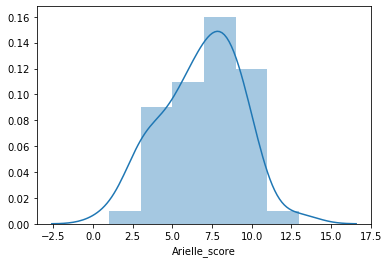

In [7]:
sns.distplot(success_flips.Arielle_score)

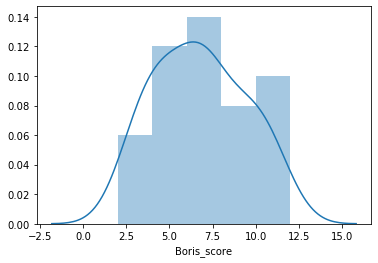

In [8]:
sns.distplot(success_flips.Boris_score)

In [9]:
success_flips.skew()

Days             0.000000
Arielle_score   -0.198539
Boris_score      0.159796
dtype: float64

In [10]:
success_flips.kurtosis()

Days            -1.200000
Arielle_score   -0.220988
Boris_score     -0.963946
dtype: float64

In [11]:
t_stat, p_val= ss.ttest_ind(success_flips.Arielle_score,success_flips.Boris_score)
print("T-stat:", round(t_stat,3))
print("P-valu:", round(p_val,3))

T-stat: 0.118
P-valu: 0.907


Here, our p-value is way higher than the significance level i.e 0.05. Hence, we cannot reject the null hypothesis. This means that based on our A/B testing, scores of Arielle and Boris are not statistically significant. 

#### Conclusion of Exp 1: Experiment is inconclusive. Arielle and Boris both appears to be equally good.

### Experiment 2:  Considering only Dominant hand with 35 Match days

In [12]:
Dominant_hand_Ar = success_flips[(success_flips['Arielle_hand']=='R')]
Dominant_hand_Bo = success_flips[(success_flips['Boris_hand']=='L')]
Dominant_hand_Ar_Bo =pd.DataFrame({'Arielle_score': Dominant_hand_Ar['Arielle_score'].tolist(), 
                                   'Boris_score':Dominant_hand_Bo['Boris_score'].tolist()})

Dominant_hand_Ar_Bo

,Arielle_score,Boris_score
0,8,7
1,10,3
2,6,10
3,7,3
4,9,5
5,9,7
6,13,4
7,8,7
8,7,8
9,10,3


In [96]:
Dominant_hand_Ar_Bo.describe()

,Arielle_score,Boris_score
count,35.000000,35.000000
mean,7.685714,5.685714
std,2.125080,2.179739
min,3.000000,2.000000
25%,6.500000,4.000000
50%,8.000000,5.000000
75%,9.000000,7.000000
max,13.000000,11.000000


In [98]:
Dominant_hand_Ar_Bo.skew()

Arielle_score   -0.283262
Boris_score      0.501200
dtype: float64

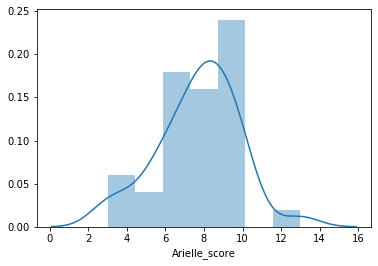

In [99]:
sns.distplot(Dominant_hand_Ar_Bo.Arielle_score)

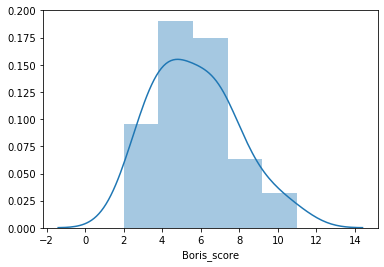

In [100]:
sns.distplot(Dominant_hand_Ar_Bo.Boris_score)

In [14]:
t_stat, p_val= ss.ttest_ind(Dominant_hand_Ar_Bo.Arielle_score,Dominant_hand_Ar_Bo.Boris_score)
print("T-stat:", round(t_stat,3))
print("P-valu:", round(p_val,4))

T-stat: 3.887
P-valu: 0.0002


Here, our p-value is lower than the significance level i.e 0.05. Hence, we can easily reject the null hypothesis. This means that based on our A/B testing, scores of Arielle and Boris are statistically significant. 

Arielle (#Flips: 269, Mean: 7.68, SD: 2.12) has clearly outperformed Boris (#Flips: 199, Mean: 5.68, SD: 2.17) by a very large margin.

#### Conclusion of Exp 2: Arielle (R) is better flipper than Boris (L) while using Dominant hand.

### Experiment 3:  Considering only Submissive hand with 15 Match days

In [15]:
Submissive_hand_Ar = success_flips[(success_flips['Arielle_hand']=='L')]
Submissive_hand_Bo = success_flips[(success_flips['Boris_hand']=='R')]
Submissive_hand_Ar_Bo =pd.DataFrame({'Arielle_score': Submissive_hand_Ar['Arielle_score'].tolist(), 
                                   'Boris_score':Submissive_hand_Bo['Boris_score'].tolist()})

Submissive_hand_Ar_Bo

,Arielle_score,Boris_score
0,4,10
1,5,9
2,6,10
3,3,6
4,6,7
5,6,10
6,1,7
7,7,9
8,5,11
9,8,8


In [16]:
Submissive_hand_Ar_Bo.describe()

,Arielle_score,Boris_score
count,15.000000,15.000000
mean,4.800000,9.266667
std,2.042408,1.751190
min,1.000000,6.000000
25%,3.000000,8.000000
50%,5.000000,10.000000
75%,6.000000,10.500000
max,8.000000,12.000000


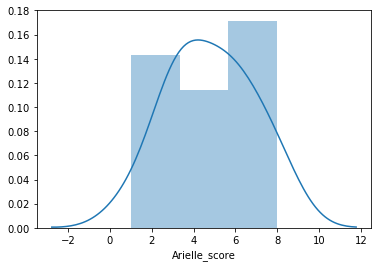

In [17]:
sns.distplot(Submissive_hand_Ar_Bo.Arielle_score)

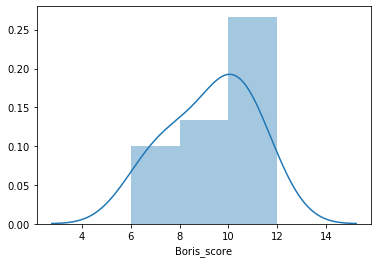

In [18]:
sns.distplot(Submissive_hand_Ar_Bo.Boris_score)

In [26]:
t_stat, p_val= ss.ttest_ind(Submissive_hand_Ar_Bo.Arielle_score,Submissive_hand_Ar_Bo.Boris_score)
print("T-stat:", round(t_stat,3))
print("P-valu:", round(p_val,6))

T-stat: -6.43
P-valu: 1e-06


Here, our p-value is lower than the significance level i.e 0.05. Hence, we can easily reject the null hypothesis. This means that based on our A/B testing, scores of Arielle and Boris are statistically significant. 

Boris (#Flips: 139, Mean: 9.26, SD: 1.75) has clearly outperformed Arielle (#Flips: 72, Mean: 4.80, SD: 2.04) by a very large margin.

#### Conclusion of Exp 3: Boris (R) is better flipper than Arielle (L) while using Submissive hand.

### Conclusion: 
    1. Both Arielle and Borris appears to be performing very well based on the population parameters estimation
    2. If we consider Dominant Hand data alone, we can conclude Arielle as winner
    3. If we consider Submissive Hand data alone, we can conclude Borris as winner
    4. My recommendation is to play one more 'non-Draw' match and conclude the winner